# AGRUPAMENTO K-MEANS USANDO PYTHON
Dataset usado: bmw.csv

### Importação de Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

### Leitura de Dados no formato .CSV

In [22]:
df = pd.read_csv("ObesityDataSet.csv", sep=',')

df.Gender = df.Gender.replace({'Male': 0, 'Female': 1})
df.family_history_with_overweight = df.family_history_with_overweight.replace({'yes': 0, 'no': 1})
df.FAVC = df.FAVC.replace ({'yes': 0, 'no': 1})
df.CAEC = df.CAEC.replace ({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.SMOKE = df.SMOKE.replace({'yes': 0, 'no': 1})
df.SCC = df.SCC.replace({'yes': 0, 'no': 1})
df.CALC = df.CALC.replace({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.MTRANS = df.MTRANS.replace({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})
df.NObeyesdad = df.NObeyesdad.replace({'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Insufficient_Weight': 3, 
                                       'Obesity_Type_I': 4, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5})

### Para Agrupamento (clustering), feature "id" não é bem-vinda!

In [31]:
# Vamos excluir o CustomerID..Vamos lá !
# Agora ficará: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
X_obesity = df.iloc[:, 1:17].values

### Criação do modelo de Agrupamento (Clustering) usando K-Means

In [24]:
#Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

### Treino do modelo e exibindo os centroids

In [25]:
kmeans.fit(X_obesity) # Treino do modelo com os Dados

kmeans.cluster_centers_ # Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features

kmeans.fit(X_obesity) # Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)

kmeans.cluster_centers_ # Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features

c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[2.62343301e+01, 1.70713170e+00, 8.37929037e+01, 8.27770360e-02,
        1.13484646e-01, 2.26402924e+00, 2.53612121e+00, 1.29506008e-01,
        9.81308411e-01, 2.00012996e+00, 9.74632844e-01, 1.07755958e+00,
        6.39076338e-01, 1.26168224e+00, 7.24966622e-01, 2.34579439e+00],
       [2.54181627e+01, 1.74280132e+00, 1.17150654e+02, 2.82885431e-03,
        1.41442716e-02, 2.64063189e+00, 2.84501098e+00, 2.40452617e-02,
        9.75954738e-01, 2.11755124e+00, 9.97171146e-01, 8.49636170e-01,
        5.89012396e-01, 3.56435644e-01, 3.40876945e-01, 4.44978784e+00],
       [2.09217467e+01, 1.65105148e+00, 5.67889640e+01, 4.90076336e-01,
        2.29007634e-01, 2.35712253e+00, 2.68455460e+00, 5.90839695e-01,
        9.80152672e-01, 1.89878779e+00, 8.85496183e-01, 1.10679930e+00,
        7.53671792e-01, 1.20916031e+00, 3.77099237e-01, 1.51908397e+00]])

### Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)

In [26]:
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(X_obesity)
distance

c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[53.60731886, 20.7509455 ,  7.77066432],
       [61.54541712, 28.56715032,  3.65565929],
       [40.51136098,  8.04900277, 20.43560224],
       ...,
       [16.8205571 , 50.13478566, 77.01471602],
       [16.27113551, 49.69677258, 76.73817885],
       [16.45556953, 49.85369085, 76.83583567]])

### Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?

In [27]:
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([2, 2, 1, ..., 0, 0, 0])

### Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features

In [28]:
kmeans.cluster_centers_

array([[2.54181627e+01, 1.74280132e+00, 1.17150654e+02, 2.82885431e-03,
        1.41442716e-02, 2.64063189e+00, 2.84501098e+00, 2.40452617e-02,
        9.75954738e-01, 2.11755124e+00, 9.97171146e-01, 8.49636170e-01,
        5.89012396e-01, 3.56435644e-01, 3.40876945e-01, 4.44978784e+00],
       [2.62343301e+01, 1.70713170e+00, 8.37929037e+01, 8.27770360e-02,
        1.13484646e-01, 2.26402924e+00, 2.53612121e+00, 1.29506008e-01,
        9.81308411e-01, 2.00012996e+00, 9.74632844e-01, 1.07755958e+00,
        6.39076338e-01, 1.26168224e+00, 7.24966622e-01, 2.34579439e+00],
       [2.09217467e+01, 1.65105148e+00, 5.67889640e+01, 4.90076336e-01,
        2.29007634e-01, 2.35712253e+00, 2.68455460e+00, 5.90839695e-01,
        9.80152672e-01, 1.89878779e+00, 8.85496183e-01, 1.10679930e+00,
        7.53671792e-01, 1.20916031e+00, 3.77099237e-01, 1.51908397e+00]])

### Visualizando os Clusters 

#### Exemplo 1

In [ ]:
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 6], Xbmw[:,7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('Financing')
plt.ylabel('Purchase')
plt.show()


#### Exemplo 2


In [ ]:
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 3], Xbmw[:, 7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('M5')
plt.ylabel('Purchase')
plt.show()


### Cálculo do WCSSE - Within Cluster Sum of Squared Errors

In [29]:
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X_obesity)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)


1 1550273.775587417
2 508940.01921320346
3 287274.1498876251
4 202625.1595475179
5 164501.76546866947
6 131996.9801480445
7 104756.51390916726
8 95016.78719022944
9 85918.54858887971
10 79030.2942170548


c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

### Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow

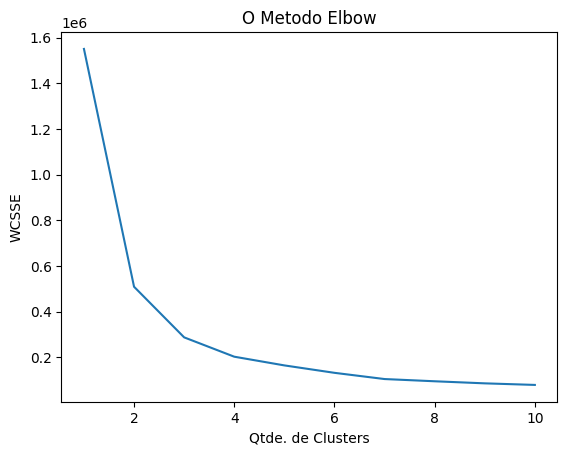

In [30]:
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()


### Clientes

In [ ]:
# Para o cliente 1 => Dealership=1, Showroom=1, ComputerSearch=1, M5=1, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=4
newcustomer1= [ [1, 1, 1, 1, 1, 1, 1, 1] ]
kmeans.predict(newcustomer1)

# Para o cliente 2 => Dealership=1, Showroom=0, ComputerSearch=0, M5=0, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=2

newcustomer2 = [ [1, 0, 0, 0, 1, 1, 1, 1] ]
kmeans.predict(newcustomer2)